In [235]:
import pandas as pd
df=pd.read_csv('EMOTION.csv')
df

,word,emotion,emotion-intensity-score
0,outraged,anger,0.964
1,brutality,anger,0.959
2,hatred,anger,0.953
3,hateful,anger,0.940
4,terrorize,anger,0.939
...,...,...,...
9916,fugitive,trust,0.141
9917,divorce,trust,0.133
9918,mistakes,trust,0.133
9919,bait,trust,0.133


In [236]:
df[df.emotion=='trust']

,word,emotion,emotion-intensity-score
8357,truthfulness,trust,0.906
8358,trusted,trust,0.883
8359,trustworthy,trust,0.867
8360,truth,trust,0.844
8361,honor,trust,0.844
...,...,...,...
9916,fugitive,trust,0.141
9917,divorce,trust,0.133
9918,mistakes,trust,0.133
9919,bait,trust,0.133


In [11]:
zip_iterator = zip(df.word, df.emotion)
D= dict(zip_iterator)
D

{'outraged': 'anger',
 'brutality': 'fear',
 'hatred': 'sadness',
 'hateful': 'sadness',
 'terrorize': 'sadness',
 'infuriated': 'anger',
 'violently': 'sadness',
 'furious': 'disgust',
 'enraged': 'anger',
 'furiously': 'anger',
 'screwyou': 'anger',
 'murderer': 'sadness',
 'fury': 'sadness',
 'execution': 'trust',
 'angered': 'anger',
 'savagery': 'fear',
 'slaughtering': 'surprise',
 'veryangry': 'anger',
 'assassinate': 'fear',
 'fuckoff': 'anger',
 'annihilation': 'sadness',
 'rage': 'anger',
 'loathe': 'disgust',
 'damnation': 'sadness',
 'roadrage': 'anger',
 'fucktard': 'anger',
 'homicidal': 'fear',
 'furor': 'anger',
 'hostile': 'fear',
 'annihilate': 'fear',
 'murder': 'surprise',
 'raging': 'fear',
 'sopissed': 'anger',
 'pissed': 'anger',
 'rape': 'sadness',
 'explosive': 'surprise',
 'obliterated': 'fear',
 'vengeful': 'fear',
 'ferocious': 'fear',
 'infuriates': 'anger',
 'killing': 'sadness',
 'combative': 'fear',
 'gofuckyourself': 'anger',
 'vengeance': 'fear',
 'wra

In [5]:
set(df.emotion)

{'anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust'}

## Combine all dataset and sort by Keywords

In [112]:
import pandas as pd
d1=pd.read_csv('Adulting1012016-2021.csv')
d2=pd.read_csv('Adulting2016-2021.csv')
d3=pd.read_csv('LifeProTips2020.12-2021.csv')
d4=pd.read_csv('explainlikeimfive2020-2021.csv')
d5=pd.read_csv('financialindependence2020.2-2021.csv')
d6=pd.read_csv('personalfinance2020-2021.csv')
d7=pd.read_csv('youngadults2016-2021.csv')

In [113]:
d1['type']='Adult'
d2['type']='Adult'
d3['type']='Adult'
d7['type']='Adult'

d4['type']='Finance'
d5['type']='Finance'
d6['type']='Finance'

In [114]:
import re
def clean(df):

    #drop duplicate
    df1=df.drop_duplicates(subset=['selftext'],keep='first')

    #drop those with text=NA
    df1=df1.dropna(subset=['selftext'])
    #drop meaningless text
    df1=df1[(df1.selftext!='[removed]') & (df1.selftext!='[deleted]')]
    
    #df1['selftext']=df1['selftext'].str.lower()
    df1['selftext']=df1['selftext'].apply(lambda x: re.sub("\n",'', x))
    
    return df1

In [115]:
Data=pd.concat([d1,d2,d3,d4,d5,d6,d7],axis=0)[['selftext','num_comments','score','title','type']]
Data=clean(Data)
Data

,selftext,num_comments,score,title,type
0,Is it weird for an adult to wear a high school...,2,1,state championship ring,Adult
2,You’re moving out. Great! Whether it’s from ho...,0,11,[101] Leases and Roommates 101,Adult
3,Hey! You just moved into your first apartment...,3,13,"[101]Kitchen 101: What You Really, Really Need...",Adult
4,This is the first part of a series of posts I’...,3,11,[101]What to look at before renting your first...,Adult
6,This is a place to learn all of the simple thi...,0,9,Welcome to /r/adulting101!,Adult
...,...,...,...,...,...
6023,"If you feel up to answering, what are your pla...",14,1,Hello humanoes! I hope y'all have a good day t...,Adult
6025,Do not ask me what we had to do to acquire the...,0,1,And Now we have a 20 foot tall inflatable gori...,Adult
6027,"Hi there! My name is Rose. I’m 22 years old, j...",1,1,Advice about a Job/Life,Adult
6028,22 M from Australia we are in a strict lockdow...,1,1,Anyone up for a conversation?,Adult


In [116]:
Data=Data.reset_index()

In [117]:
def extract(sentence_ele,word):
    L=[]
    for i in sentence_ele:
        if word in i: 
            L.append(i)
    return L

In [118]:
from nltk.tokenize import sent_tokenize
#nltk.download('punkt')
Data1=Data.copy()
sentence=Data1['selftext'].apply(lambda x: sent_tokenize(x))
parent_sentence=sentence.apply(lambda x: extract(x,'parent'))
Data1['selftext']=parent_sentence.apply(lambda x: ' '.join(x))
index=Data1[Data1['selftext'].str.contains("parent")].index
df_pa=Data1.iloc[index]
len(index)

3882

In [121]:
from nltk.tokenize import sent_tokenize
#nltk.download('punkt')
Data1=Data.copy()
sentence=Data1['selftext'].apply(lambda x: sent_tokenize(x))
parent_sentence=sentence.apply(lambda x: extract(x,'emergency fund'))
Data1['selftext']=parent_sentence.apply(lambda x: ' '.join(x))

index=Data1[Data1['selftext'].str.contains("emergency fund")].index
df_em=Data1.iloc[index]
len(index)

966

In [122]:
Data1=Data.copy()
sentence=Data1['selftext'].apply(lambda x: sent_tokenize(x))
parent_sentence=sentence.apply(lambda x: extract(x,'loan'))
Data1['selftext']=parent_sentence.apply(lambda x: ' '.join(x))

index=Data1[Data1['selftext'].str.contains("loan")].index
df_lo=Data1.iloc[index]
len(index)

5229

In [123]:
Data1=Data.copy()
sentence=Data1['selftext'].apply(lambda x: sent_tokenize(x))
parent_sentence=sentence.apply(lambda x: extract(x,'credit'))
Data1['selftext']=parent_sentence.apply(lambda x: ' '.join(x))


index=Data1[Data1['selftext'].str.contains("credit")].index
df_cr=Data1.iloc[index]
len(index)

5989

In [125]:
def extract_1(sentence_ele):
    L=[]
    for i in sentence_ele:
        if 'earlier' in i: 
            L.append(i)
        elif 'behind' in i:
            L.append(i)
        elif 'have time' in i:
            L.append(i)
    return L

In [127]:
Data1=Data.copy()
sentence=Data1['selftext'].apply(lambda x: sent_tokenize(x))
parent_sentence=sentence.apply(lambda x: extract_1(x))
Data1['selftext']=parent_sentence.apply(lambda x: ' '.join(x))


index=Data1[Data1['selftext'].str.contains("earlier|behind|have time")].index
df_t=Data1.iloc[index]
len(index)

1320

In [128]:
Data1=Data.copy()
sentence=Data1['selftext'].apply(lambda x: sent_tokenize(x))
parent_sentence=sentence.apply(lambda x: extract(x,'social'))
Data1['selftext']=parent_sentence.apply(lambda x: ' '.join(x))

index=Data1[Data1['selftext'].str.contains("social")].index
df_so=Data1.iloc[index]
len(index)

1082

In [129]:
Data1=Data.copy()
sentence=Data1['selftext'].apply(lambda x: sent_tokenize(x))
parent_sentence=sentence.apply(lambda x: extract(x,'advisor'))
Data1['selftext']=parent_sentence.apply(lambda x: ' '.join(x))

index=Data1[Data1['selftext'].str.contains("advisor")].index
df_ad=Data1.iloc[index]
len(index)

535

In [134]:
Data1=Data.copy()
sentence=Data1['selftext'].apply(lambda x: sent_tokenize(x))
parent_sentence=sentence.apply(lambda x: extract(x,'college'))
Data1['selftext']=parent_sentence.apply(lambda x: ' '.join(x))

index=Data1[Data1['selftext'].str.contains("college")].index
df_co=Data1.iloc[index]
len(index)

3269

In [135]:
# df_em.to_csv('NEW_Keywords_emergency.csv', mode='a', encoding='utf-8', index=False)
# df_lo.to_csv('NEW_Keywords_loan.csv', mode='a', encoding='utf-8', index=False)
# df_cr.to_csv('NEW_Keywords_credit.csv', mode='a', encoding='utf-8', index=False)
# df_t.to_csv('NEW_Keywords_time.csv', mode='a', encoding='utf-8', index=False)
# df_so.to_csv('NEW_Keywords_social.csv', mode='a', encoding='utf-8', index=False)
# df_ad.to_csv('NEW_Keywords_advisor.csv', mode='a', encoding='utf-8', index=False)
# df_pa.to_csv('NEW_Keywords_parent.csv', mode='a', encoding='utf-8', index=False)
# df_co.to_csv('NEW_Keywords_college.csv', mode='a', encoding='utf-8', index=False)

In [138]:
def sent_df(df):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
    import my_module
    import importlib
    importlib.reload(my_module)

    #create a list of dictionaries
    sia = SIA()
    results = []
    words=[]

    for line in df['selftext']:
        D,pol_score=my_module.polarity_scores(sia,text=line) #use customized module
        pol_score['selftext'] = line
        results.append(pol_score)
        words.append(D)
    #Extract sentiment words
    D_p=[] # positive word and its sentiment score
    D_n=[] # negative word and its sentiment score
    D1=[] # only positive word
    D2=[] # only negative word
    for i in range(len(words)):
        newDict = {key: value for (key, value) in words[i].items() if value != 0.0 }
        newDict1 = {key: value for (key, value) in words[i].items() if value > 0.0 }
        newDict2 = {key: value for (key, value) in words[i].items() if value < 0.0 }
        D_p.append(newDict1)
        D_n.append(newDict2)
        D1.append(list(newDict1.keys()))
        D2.append(list(newDict2.keys()))
    #create a df to write in the results of sentiment analysis
    sent = pd.DataFrame(results)
    sent['p_word_dict']=D_p
    sent['n_word_dict']=D_n
    p=[]
    n=[]
    for i in D1:
        p.append(' '.join(i))
    for i in D2:
        n.append(' '.join(i))
    sent['total']=(sent.pos-sent.neg)/sent.neu    
    sent['p_word']=p
    sent['n_word']=n
    sent['label']=0
    sent['label'].loc[sent['total']> 0]=1
    sent['label'].loc[sent['total']< 0]=-1
    return sent

In [209]:
a=sent_df(df_em)
a['keyword']='Emergency fund'

b=sent_df(df_lo)
b['keyword']='Loans'

import numpy as np
c[np.isinf(c.total)] #index=2857 produces inf
c=sent_df(df_cr)
c=c.drop(2857)
c['keyword']='Credit'

d=sent_df(df_t)
d['keyword']='Time'

e=sent_df(df_so)
e['keyword']='Social'

f=sent_df(df_ad)
f['keyword']='Advisor'

g=sent_df(df_pa)
g['keyword']='Parent'

h=sent_df(df_co)
h['keyword']='College'


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [210]:
ALL=pd.concat([a,b,c,d,e,f,g,h],axis=0)
ALL.total.describe()

count    22271.000000
mean         0.071757
std          0.246046
min        -10.904762
25%         -0.004489
50%          0.044932
75%          0.160437
max          6.692308
Name: total, dtype: float64

In [211]:
h.total.describe()

count    3269.000000
mean        0.036386
std         0.190351
min        -4.714286
25%         0.000000
50%         0.000000
75%         0.114827
max         1.638522
Name: total, dtype: float64

[Text(0, 0.5, 'Sentiment Score'),
 Text(0.5, 0, 'Keywords'),
 Text(0.5, 1.0, 'Sentiment Score by Keywords')]

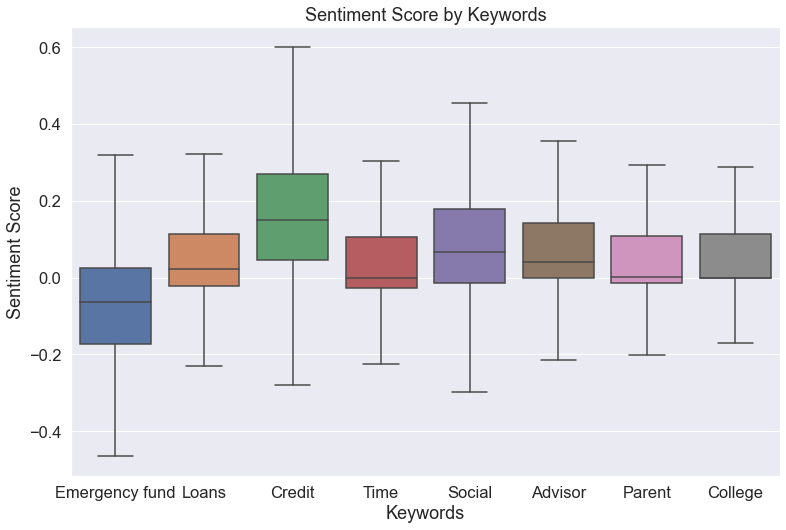

In [222]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12.7,8.27)})
sns.set(font_scale=1.5)
ax = sns.boxplot(x="keyword", y="total", data=ALL,showfliers = False)
ax.set(xlabel="Keywords",ylabel="Sentiment Score",title="Sentiment Score by Keywords")

## By subreddit

In [224]:
d1=clean(d1)
d2=clean(d2)
d3=clean(d3)
d4=clean(d4)
d5=clean(d5)
d6=clean(d6)
d7=clean(d7)

In [225]:
a=sent_df(d1)
a['Subreddit']='Adulting101'

b=sent_df(d2)
b[np.isinf(b.total)] #index=544,1791 produces inf
b=b.drop([544,1791])
b['Subreddit']='Adulting'

c=sent_df(d3)
c['Subreddit']='LifeProTips'

d=sent_df(d4)
d['Subreddit']='Explain Like Im Five'

e=sent_df(d5)
e['Subreddit']='Financial Independence'

f=sent_df(d6)
f[np.isinf(f.total)] 
f=f.drop([13352, 13676, 16815, 18175, 20006])
f['Subreddit']='Personal Finance'

g=sent_df(d7)
g[np.isinf(g.total)] 
g=g.drop([ 304,  453,  676, 1218, 1511, 1513, 1696, 1924, 2154, 2262, 2509,
            2519, 3352, 3722, 3767])
g['Subreddit']='YoungAdults'


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [226]:
f.total.describe()

count    2.315200e+04
mean              NaN
std               NaN
min              -inf
25%      0.000000e+00
50%      5.422993e-02
75%      1.160714e-01
max               inf
Name: total, dtype: float64

In [227]:
g.total.describe()

count    4078.000000
mean             NaN
std              NaN
min             -inf
25%        -0.033971
50%         0.027206
75%         0.149229
max              inf
Name: total, dtype: float64

In [228]:
ALL=pd.concat([a,b,c,d,e,f,g],axis=0)
ALL.total.describe()

count    4.783900e+04
mean              NaN
std               NaN
min              -inf
25%      0.000000e+00
50%      5.708245e-02
75%      1.285190e-01
max               inf
Name: total, dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


[Text(0, 0.5, 'Sentiment Score'),
 Text(0.5, 1.0, 'Sentiment Score by Subreddits')]

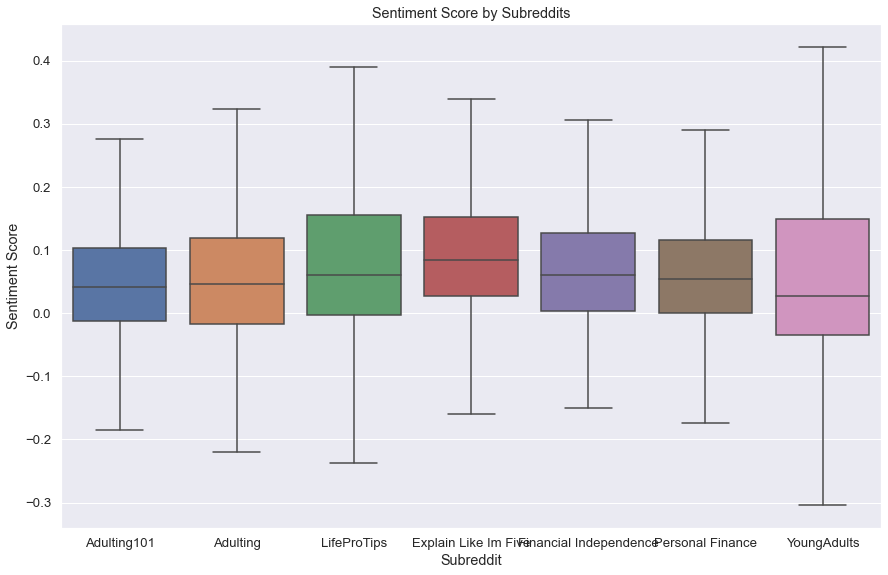

In [233]:
sns.set(rc={'figure.figsize':(14.7,9.27)})
sns.set(font_scale=1.2)
ax = sns.boxplot(x="Subreddit", y="total", data=ALL,showfliers = False)
ax.set(ylabel="Sentiment Score",title="Sentiment Score by Subreddits")